# Lezione 2 Pratica

In [2]:
# Librerie
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.io as io
plt.rcParams['figure.figsize'] = [10, 5]

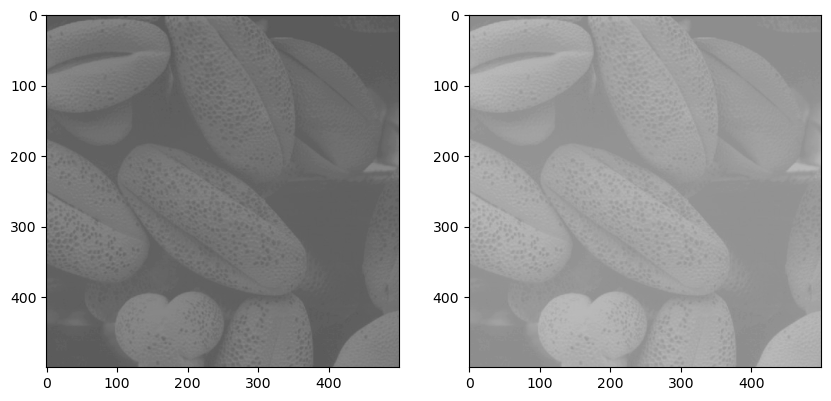

In [46]:
x = io.imread("granelli.jpg")
x = np.float64(x)

plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(x, clim=[0,255], cmap="gray")

x_min = np.min(x)
x_max = np.max(x)

y = x + 50

plt.subplot(1,2,2)
plt.imshow(y, clim=[0,255], cmap="gray")

(0.0, 255.0)

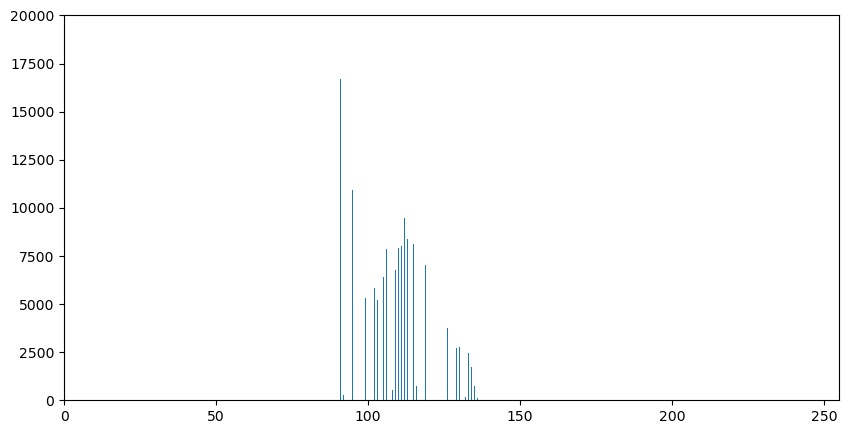

In [47]:
plt.hist(x.flatten(), bins=256)
plt.xlim((0,255))

In [48]:
def fshs(x, k=256):
    x_min = np.min(x)
    x_max = np.max(x)

    x = (k-1)*((x-x_min)/(x_max - x_min))
    return x

(0.0, 255.0)

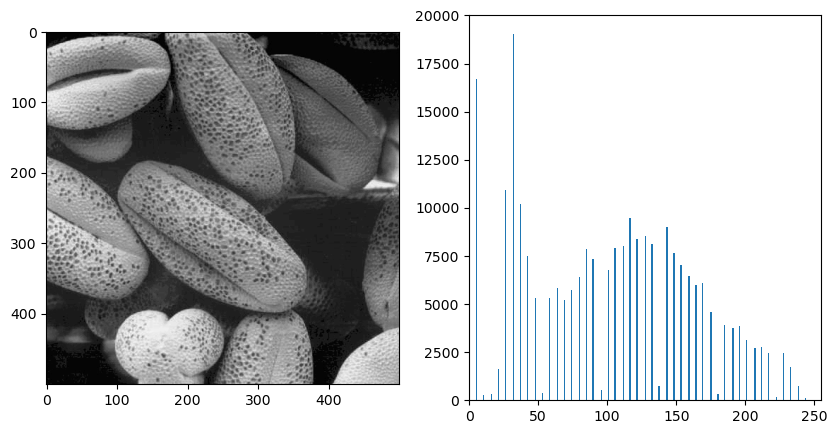

In [49]:
y = fshs(x, 255)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(y, clim=[0,255], cmap="gray")
plt.subplot(1,2,2)
plt.hist(y.flatten(), bins=256)
plt.xlim((0,255))

Funzione con logaritmo potente

/tmp/ipykernel_5803/2291079144.py:8: RuntimeWarning: divide by zero encountered in log
  y = np.log(x+1)


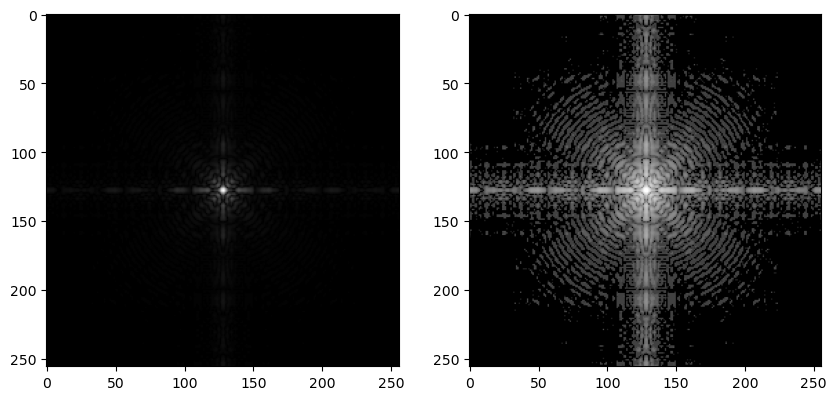

In [52]:
x = io.imread("spettro.jpg")
np.float64(x)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=None, cmap="gray")

y = np.log(x+1)

plt.subplot(1,2,2)

# Devo stare attento a settare clim in modo da poter considerare i vari livelli di grigio variati
# e quindi visualizzare un immagine adattate. Se specifico il range allora visualizzerò tali valori rispetto
# a quel range ma non ad un range ridotto
plt.imshow(y, clim=None, cmap="gray")

### Potenza

In [39]:
def potenza(x, pot):
    y = x ** pot
    return y

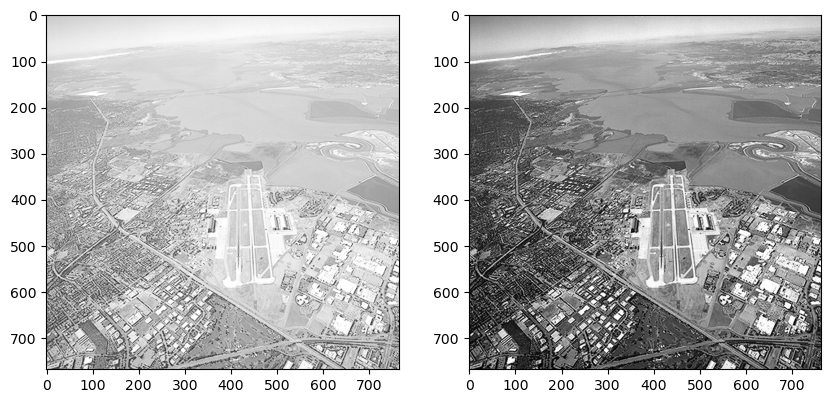

In [68]:

x = io.imread("vista_aerea.jpg")

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=[0,255], cmap="gray")

y = potenza(x, 3.0)

plt.subplot(1,2,2)
y = fshs(y)
plt.imshow(y, clim=[0,255], cmap="gray")

### Equalizzazione dell'istogramma

(array([367460.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  14849.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,  24799.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,  19518.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,  15320.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,  13035.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,  12791.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
         12103.,      0.,      0.,      0.,      0.,      0.,      0.,
      

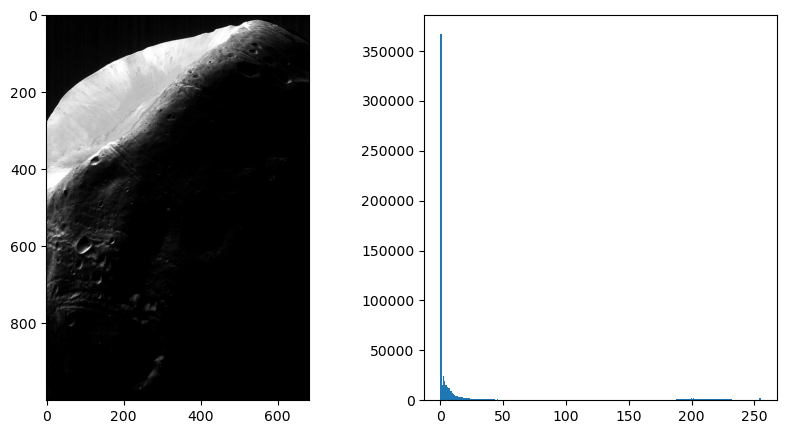

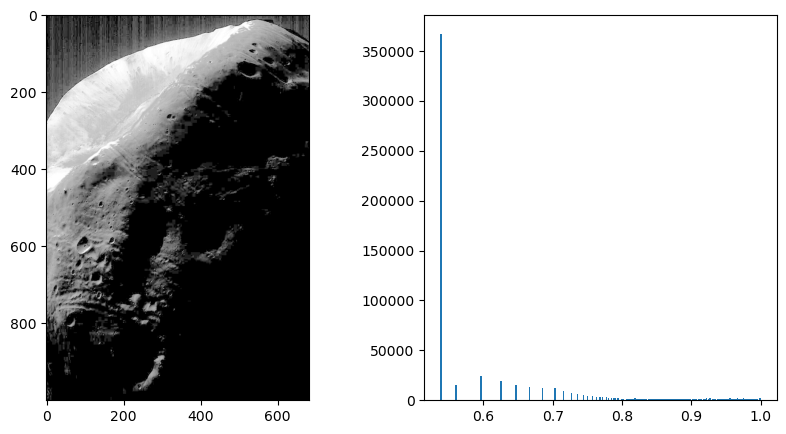

In [ ]:
import skimage
import skimage.exposure
x = io.imread("marte.jpg")

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=None, cmap="gray")

plt.subplot(1,2,2)
plt.hist(x.flatten(), bins=256)

# Visto l'istogramma vogliamo equalizzarlo
x = skimage.exposure.equalize_hist(x)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=None, cmap="gray")
plt.subplot(1,2,2)
plt.hist(x.flatten(), bins=256)
# Equalizzando riesco a notare vari dettagli ma non ad uniformare in maniera completa la mia immagine
# Questo poichè stiamo effettuando delle presupposizioni nel discreto, che nonostante non siano proprio precise 
# nell'equalizzazione dell'istogramma, permettono comunque di poter effettuare le giuste operazioni sull'immagine

to do:
- aprire filamento
- calcolare l'immagine delle medie locali
- Calcolo delle varianze locali
- Media locale bassa rispetto alla media globale
- Ricavare la maschera con la condizione posta a lezione:
    mask = (MED<=0.4*med) & (DEV<=0.4*dev) & (DEV>=0.02*dev)

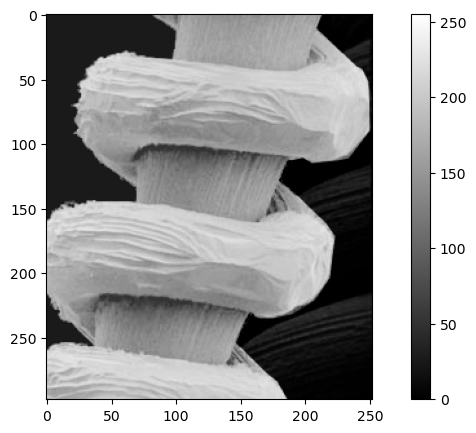

In [54]:
x = io.imread("filamento.jpg")
np.float64(x)

plt.figure()
plt.imshow(x, clim=[0,255], cmap="gray")
plt.colorbar()

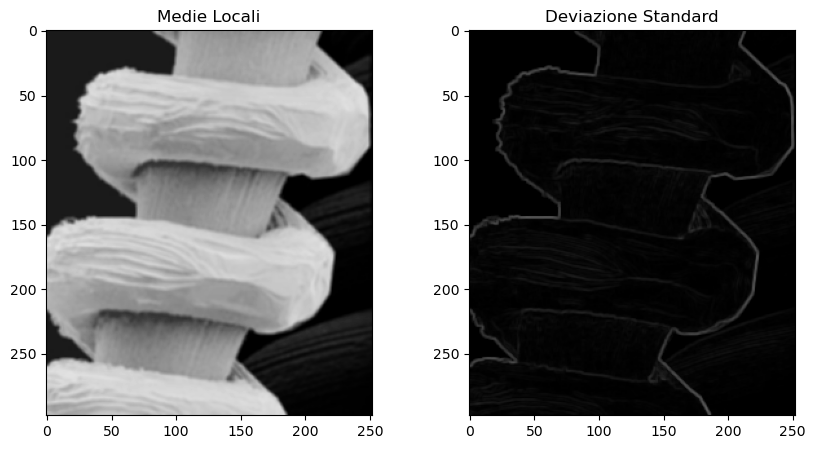

In [56]:
# Calcolo delle medie locali
avg_loc = ndi.generic_filter(x, np.mean, (3,3))

# Calcolo delle varianze locali
var_loc = ndi.generic_filter(x, np.std, (3,3))

# Media globale
avg = np.mean(x)

# Varianza Globale
var = np.std(x)

# Plot dell'immagine delle medie locali
plt.figure()
plt.subplot(1,2,1)
plt.imshow(avg_loc, clim=[0,255], cmap="gray")
plt.title("Medie Locali")

# Plot dell'immagine delle varianze locali
plt.subplot(1,2,2)
plt.title("Deviazione Standard")
plt.imshow(var_loc, clim=[0,255], cmap="gray")


Text(0.5, 1.0, 'Maschera')

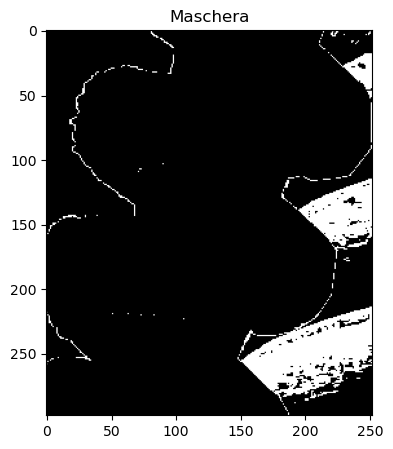

In [ ]:
# Generazione della maschera andando a confrontare le varie 
# medie locali con una parte della media locale
# e le varianze locali con parti delle varianze globali
mask = (avg_loc<=0.4*avg) & ((var_loc<=0.4*var) & (var_loc>=0.02*var))
# Vado a controllare le zone che hanno una luminosità minore di quella globale, e che mostrano
# Un contrasto che dev'essere sicuramente minore di quello globale e sicuramente maggiore di un certo valore.
# Questo certo valore viene posto in riderimento alla varianza globae e serve ad evitare quelle che sono
# le zone omogenee di un immagine

# Plot della maschera effettiva
plt.figure()
plt.imshow(mask, clim=None, cmap="gray")
plt.title("Maschera")


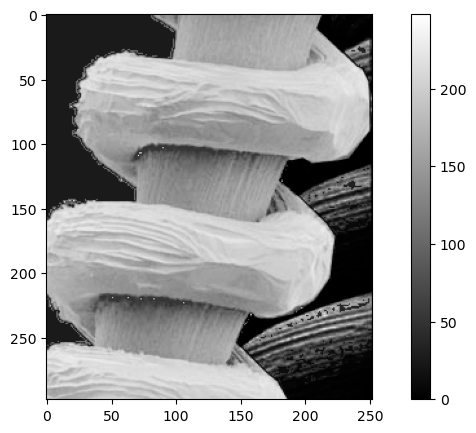

In [ ]:
# Generazione e visualizzazione del risultato
# Vado ad aumentare il contrasto sulla parte di immagine interessata, quindi la maschera
risultato = 4*x*mask + ((1-mask)*x)

plt.figure()
plt.imshow(risultato, clim=None, cmap="gray")
plt.colorbar()

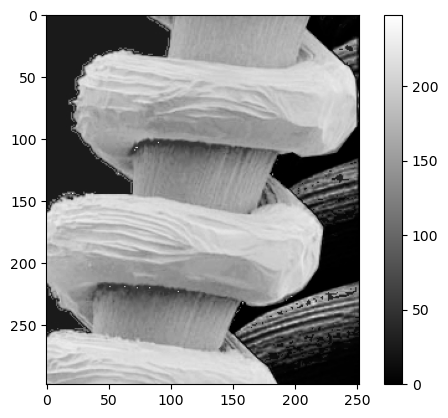

In [ ]:
# Altro modo per generare l'immagine
risultato = np.copy(x) # mi prendo la dimensione dell'immagine
risultato[mask] = 4*x[mask] # e poi la vado a modificare
# Avendo inserito mask nella prima parte, mi permette di modificare
# solo gli elementi diversi da 0 nella maschera

plt.figure()
plt.imshow(risultato, clim=None, cmap="gray")
plt.colorbar()

## BIT-PLANE Slicing

Si vuole dividere l'immagine in vari layer i cui pixel possono assumere valore 1 o 0, associati ai vari bit di rappresentazione del colore. Se sono 8 bit di rappresentazione (quindi 256 livelli di grigio), allora con la tecnica del BIT-Plane Slicing sarà possibile visualizzare ogni tavola associata ai vari bit

In [59]:
# Libreria
from bitop import bitset
from bitop import bitget

Vogliamo inserire un marchio nel bit più significativo

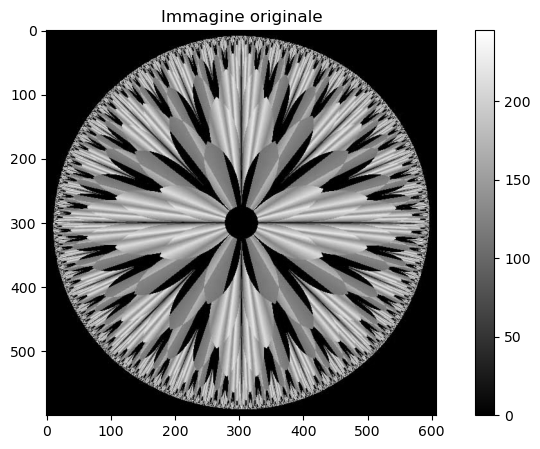

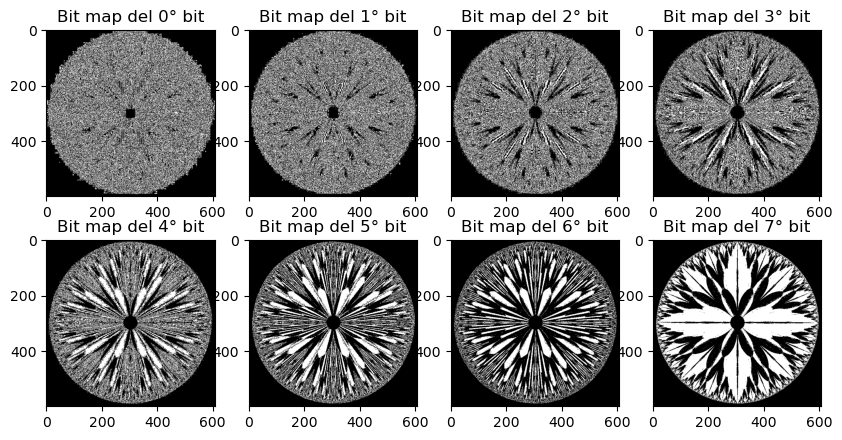

In [ ]:
x = io.imread("frattale.jpg")

plt.figure()
plt.imshow(x, clim=None, cmap="gray")
plt.colorbar()
plt.title("Immagine originale")

plt.figure()
for i in range(8):
    y = bitget(x,i)
    plt.subplot(2,4,i+1)
    plt.imshow(y, clim=None, cmap="gray")
    plt.title("Bit map del " + str(i) + "° bit")

(array([3.000e+00, 6.000e+00, 1.300e+01, 1.500e+01, 3.800e+01, 5.600e+01,
        6.600e+01, 0.000e+00, 1.040e+02, 1.150e+02, 1.590e+02, 1.950e+02,
        2.210e+02, 2.420e+02, 0.000e+00, 2.720e+02, 3.190e+02, 3.050e+02,
        3.800e+02, 4.340e+02, 4.100e+02, 0.000e+00, 3.790e+02, 4.410e+02,
        4.320e+02, 4.670e+02, 4.180e+02, 4.140e+02, 0.000e+00, 3.690e+02,
        3.430e+02, 3.210e+02, 2.930e+02, 2.920e+02, 2.960e+02, 0.000e+00,
        2.970e+02, 2.700e+02, 2.530e+02, 2.970e+02, 2.420e+02, 2.470e+02,
        0.000e+00, 2.620e+02, 2.770e+02, 2.400e+02, 2.410e+02, 2.510e+02,
        2.630e+02, 0.000e+00, 2.540e+02, 3.090e+02, 3.420e+02, 3.330e+02,
        3.210e+02, 3.630e+02, 0.000e+00, 3.970e+02, 4.180e+02, 3.730e+02,
        4.360e+02, 4.720e+02, 4.700e+02, 0.000e+00, 4.350e+02, 4.450e+02,
        4.560e+02, 4.840e+02, 4.820e+02, 5.150e+02, 5.460e+02, 0.000e+00,
        5.490e+02, 6.200e+02, 6.090e+02, 6.470e+02, 6.790e+02, 7.560e+02,
        0.000e+00, 8.360e+02, 9.520e+0

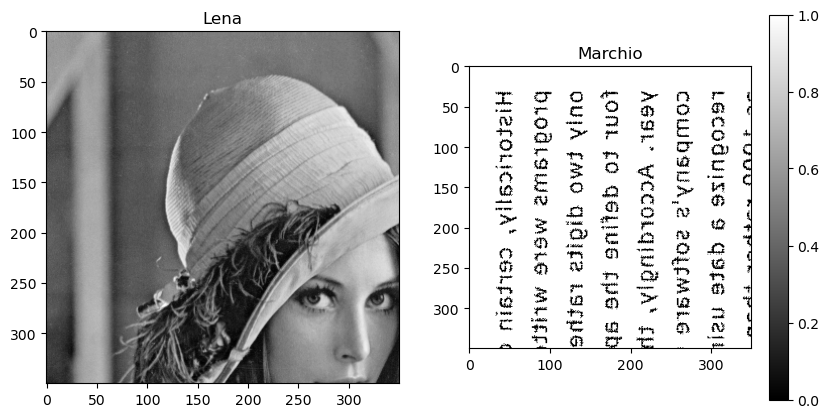

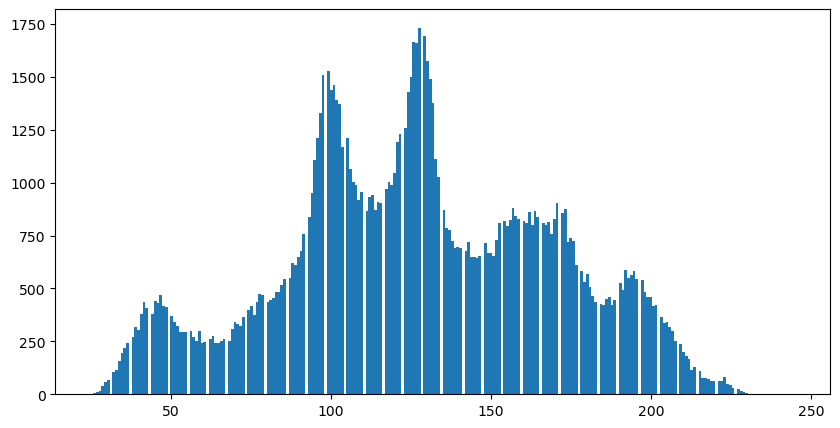

In [63]:
# Prelievo di un immagine bitraw
x = np.fromfile("lena.y", np.uint8)
x = np.reshape(x, (512,512))

# Prelievo di uno specifico marchio con cui si vuole
# marcare l'immagine
marchio = np.fromfile("marchio.y", np.uint8)
marchio = np.reshape(marchio, (350,350))

# Vado a considerare solo la porzione di immagine grande quanto il mio marchio
x = x[0:350,0:350]

# Plotto la parte di immagine considerata
plt.figure()
plt.subplot(1,2,1)
plt.title("Lena")
plt.imshow(x, clim=None, cmap="gray")

# Plotto il marchio che voglio inserire
plt.subplot(1,2,2)
plt.title("Marchio")
plt.imshow(marchio, clim=None, cmap="gray")
plt.colorbar()

# Plotto l'istogramma delle occorrenze dell'immagine da marchiare
plt.figure()
plt.hist(x.flatten(), bins=256)

(array([3.000e+00, 3.000e+00, 1.600e+01, 6.000e+00, 4.700e+01, 1.900e+01,
        1.030e+02, 0.000e+00, 2.100e+01, 1.980e+02, 3.400e+01, 3.200e+02,
        4.300e+01, 4.200e+02, 0.000e+00, 5.900e+01, 5.320e+02, 7.400e+01,
        6.110e+02, 8.100e+01, 7.630e+02, 0.000e+00, 8.500e+01, 7.350e+02,
        7.800e+01, 8.210e+02, 6.400e+01, 7.680e+02, 0.000e+00, 7.600e+01,
        6.360e+02, 6.700e+01, 5.470e+02, 4.700e+01, 5.410e+02, 0.000e+00,
        6.000e+01, 5.070e+02, 4.400e+01, 5.060e+02, 5.300e+01, 4.360e+02,
        0.000e+00, 5.000e+01, 4.890e+02, 4.600e+01, 4.350e+02, 3.400e+01,
        4.800e+02, 0.000e+00, 4.100e+01, 5.220e+02, 3.500e+01, 6.400e+02,
        2.700e+01, 6.570e+02, 0.000e+00, 3.500e+01, 7.800e+02, 3.300e+01,
        7.760e+02, 5.300e+01, 8.890e+02, 0.000e+00, 5.600e+01, 8.240e+02,
        6.100e+01, 8.790e+02, 5.300e+01, 9.440e+02, 6.000e+01, 0.000e+00,
        1.035e+03, 6.000e+01, 1.169e+03, 6.900e+01, 1.257e+03, 9.600e+01,
        0.000e+00, 1.496e+03, 1.810e+0

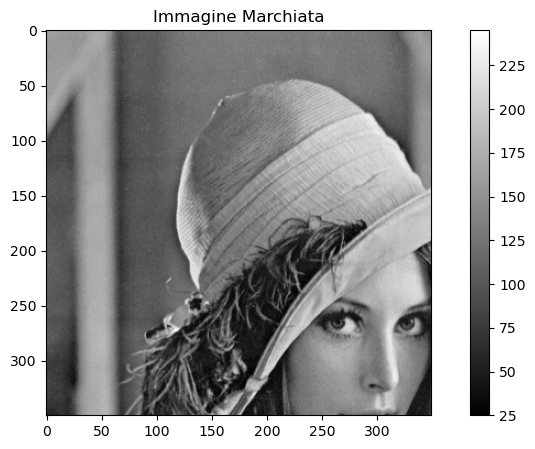

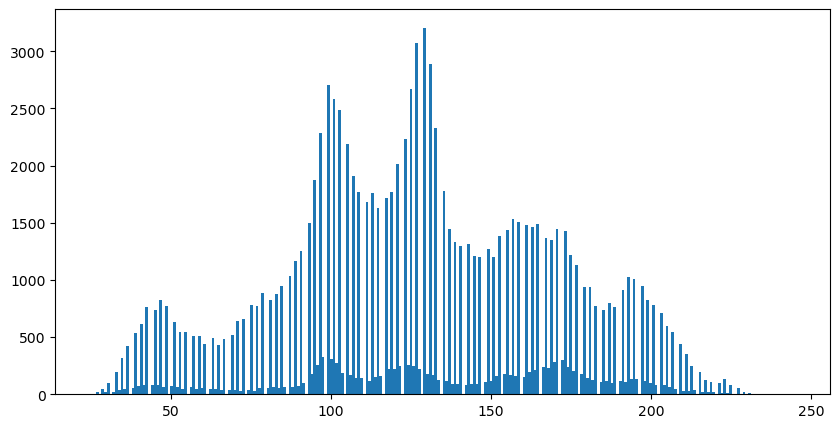

In [64]:
# tramite la funzione bitset vado ad impostare al layer contenente
# i bit di valenza 0, il mio marchio.
# Posso cambiare il layer, sostituendo 0, per vedere cosa succede a
# mano a mano che aumento il layer da considerare
y = bitset(x,0,marchio)

# Plotto la figura marchiata
plt.figure()
plt.title("Immagine Marchiata")
plt.imshow(y, clim=None, cmap="gray")
plt.colorbar()

# ed il suo corrispettivo istogramma delle occorrenze
plt.figure()
plt.hist(y.flatten(), bins=256)

### Trasformazioni geometriche

Ridimensionamento (o decimazione)

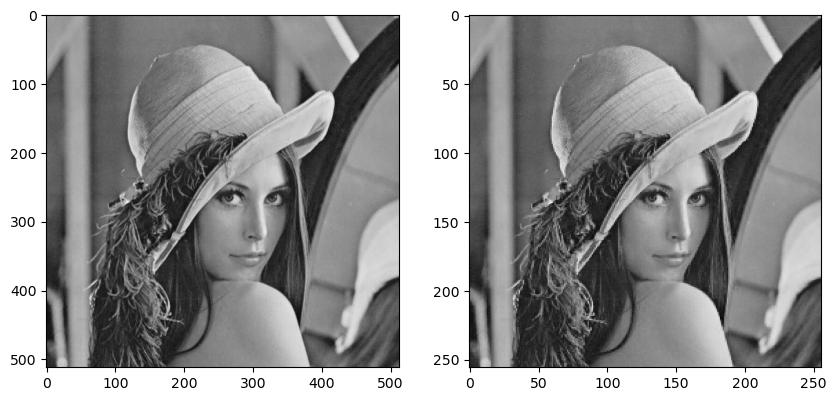

In [ ]:
x = np.float32(io.imread("lena.jpg"))

y = x[::2,::2] # Decimazione di fattore 2
# Classica decimazione per fattore intero

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=None, cmap="gray")

plt.subplot(1,2,2)
plt.imshow(y, clim=None, cmap="gray")


Decimazione per fattori non interi

Text(0.5, 1.0, 'Ordine 1')

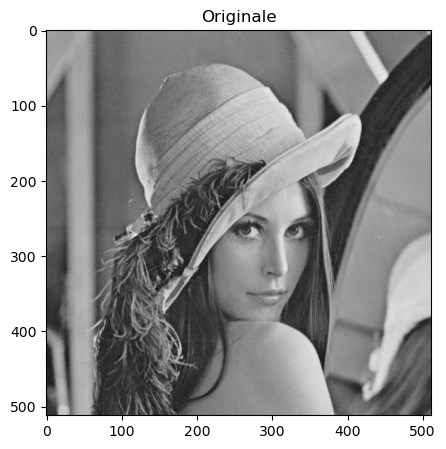

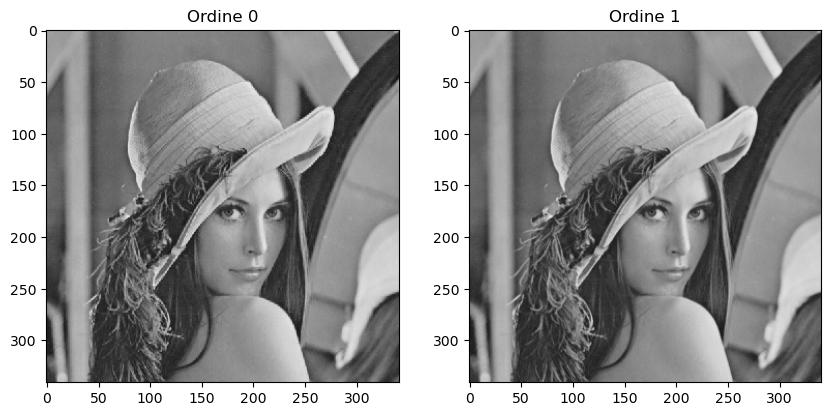

In [92]:
x = io.imread("lena.jpg")
x = np.float32(x)

# Per fare decimazione di fattori non interi andiamo a considerare
# le trasformazioni matriciali che possiamo effettuare
# y[m,n] = x[3/2 m, 3/2 n]. La problematica principale di tali valori
# è data dal come bisognerebbe considerare i pixel vuoti

# Dalla teoria andiamo a considerare varie tipologie di interpolazione
from skimage.transform import rescale

y = rescale(x, 2/3, order=0)
z = rescale(x, 2/3, order=1)

plt.figure()
plt.imshow(x, clim=[0,255], cmap="gray")
plt.title("Originale")

plt.figure()
plt.subplot(1,2,1)
plt.imshow(y, clim=[0,255], cmap="gray")
plt.title("Ordine 0")
plt.subplot(1,2,2)
plt.imshow(z, clim=[0,255], cmap="gray")
plt.title("Ordine 1")

Le trasformazioni geometriche affini possono essere espresse anche mediante matrici e possono essere implementate tramite la funzione warp

Text(0.5, 1.0, 'Interp. Ord. 3')

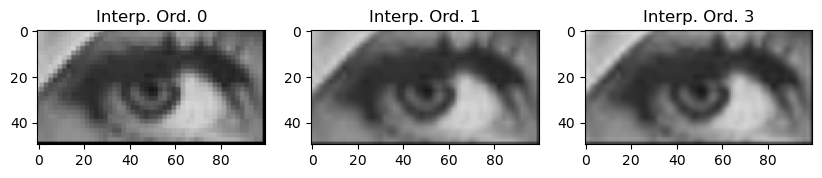

In [ ]:
from skimage.transform import warp

x = np.float32(io.imread("lena.jpg"))
x = x[252:277, 240:290]

(M,N) = x.shape

# Trasformazione affine dell'allargamento di un immagine
A = np.array([[0.5, 0, 0], [0, 0.5, 0], [0, 0, 1]])

# Per applicare la trasformazione affine devo sapere:
# - l'immagine su cui effettuare l'operazione
# - la matrice dell'operazione
# - la dimensione che avrà la nuova immagine (se omessa sarà uguale all'immagine in input)
# - l'ordine di interpolazione dei pixel
y1 = warp(x, A, output_shape=(2*M, 2*N), order=0)
y2 = warp(x, A, output_shape=(2*M, 2*N), order=1)
y3 = warp(x, A, output_shape=(2*M, 2*N), order=3)

plt.figure()

plt.subplot(1,3,1)
plt.imshow(y1, clim=[0,255], cmap="gray")
plt.title("Interp. Ord. 0")

plt.subplot(1,3,2)
plt.imshow(y2, clim=[0,255], cmap="gray")
plt.title("Interp. Ord. 1")

plt.subplot(1,3,3)
plt.imshow(y3, clim=[0,255], cmap="gray")
plt.title("Interp. Ord. 3")

In [98]:
T = np.array([[1,2,3],[4,5,6],[7,8,9]])
A = T[[1,0,2],:][:,[1,0,2]].T
print(T)
print("Print of A:")
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Print of A:
[[5 2 8]
 [4 1 7]
 [6 3 9]]


### Traslazione di un immagine

Text(0.5, 1.0, 'Traslata')

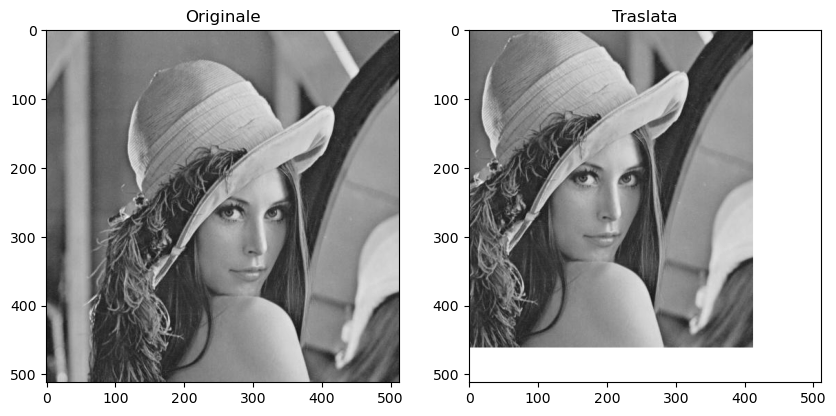

In [5]:
from skimage.transform import warp

x = np.float32(io.imread("lena.jpg"))

# Caso di trasformazione del tipo:
# - m' = m + 50
# - n' = n + 100
A = np.array([[1, 0, 100], [0, 1, 50], [0, 0, 1]], dtype=np.float32)

# In questo caso non applico alcun tipo di dimensione dell'immagine
# poichè non sto eseguendo un ridimensionamento
y = warp(x, A, order=1, cval=255) # cval indica la tipologia di riempimento che voglio delle zone che verranno generate

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=[0,255], cmap="gray")
plt.title("Originale")

plt.subplot(1,2,2)
plt.imshow(y, clim=[0,255], cmap="gray")
plt.title("Traslata")


### Rotazione di un immagine

Text(0.5, 1.0, 'Rotata')

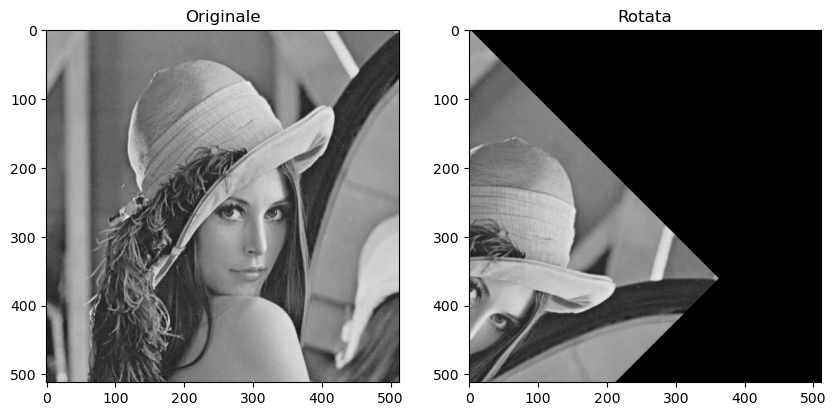

In [6]:
from skimage.transform import warp

x = np.float32(io.imread("lena.jpg"))

# Vado a generare una matrice di rotazione di pi/4
# che è composta in un certo modo
A = np.array([[np.cos(np.pi/4), np.sin(np.pi/4), 0], [-np.sin(np.pi/4), np.cos(np.pi/4), 0], [0,0,1]], dtype=np.float32)

y = warp(x, A, order=1) #Anche qui potrei inserire cval

plt.figure()

plt.subplot(1,2,1)
plt.imshow(x, clim=[0,255], cmap="gray")
plt.title("Originale")

plt.subplot(1,2,2)
plt.imshow(y, clim=[0,255], cmap="gray")
plt.title("Rotata")